## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures. 

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [6]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

In [16]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 15.6 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 13.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 11.3 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Part 1: Data Visualization and Analysis

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is bike_rental.csv.


In [144]:
# Load the dataset
bike_rental_df = pd.read_csv('bike_rental.csv')
bike_rental_df

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,December,winter,No,Thursday,Yes,cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,December,winter,No,Friday,Yes,cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,December,winter,No,Saturday,No,cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,December,winter,No,Sunday,No,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


<b> 1.1 Create a bar chart to compare the average bike rental count on holiday and non-holiday weekdays. Are there differences in rental patterns? </b>

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='holiday', ylabel='count'>

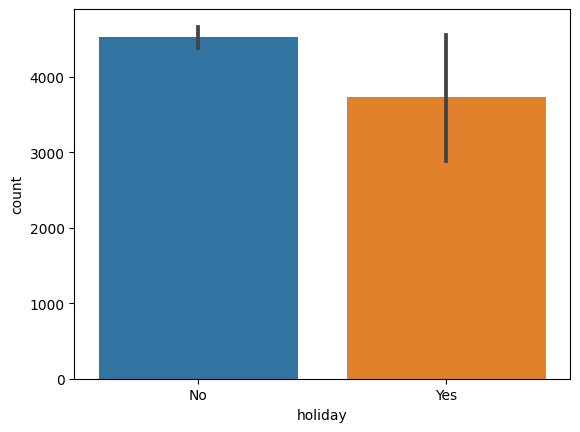

In [28]:
### Code here

sns.barplot(x = 'holiday', y = 'count', data = bike_rental_df, estimator = np.mean)


### Comment here
We can see the average bike rental count in holiday is obviously lower than that in weekdays. 

<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables. </b>
1. month 
2. season
3. working_day
4. weather
<b></b>

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='month', ylabel='count'>

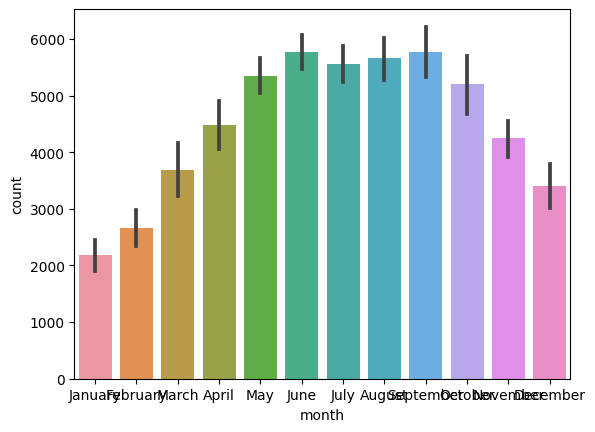

In [32]:
### Code here
sns.barplot(x = 'month', y = 'count', data = bike_rental_df, estimator = np.mean) # month

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='season', ylabel='count'>

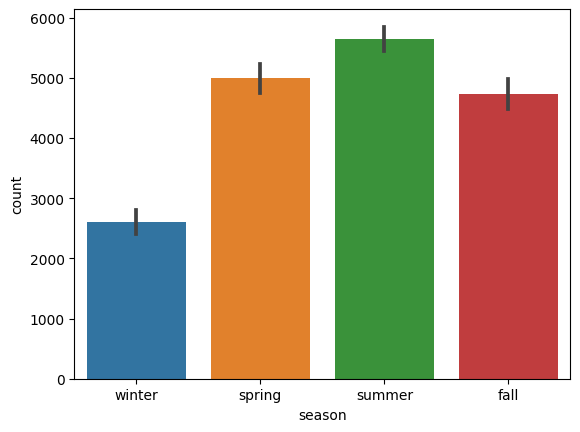

In [33]:
sns.barplot(x = 'season',y = 'count', data = bike_rental_df, estimator = np.mean) # season

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='working_day', ylabel='count'>

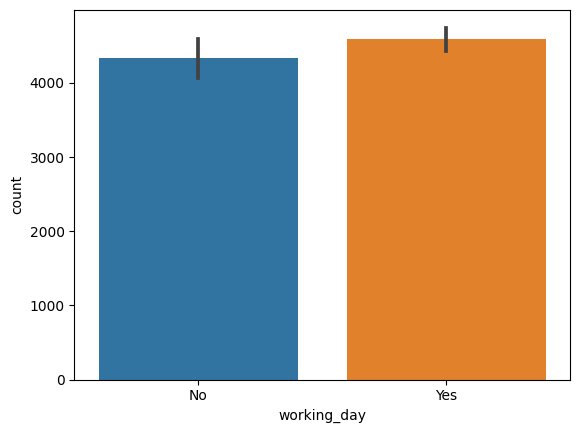

In [34]:
sns.barplot(x = 'working_day',y = 'count', data = bike_rental_df, estimator = np.mean) # season

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='weather', ylabel='count'>

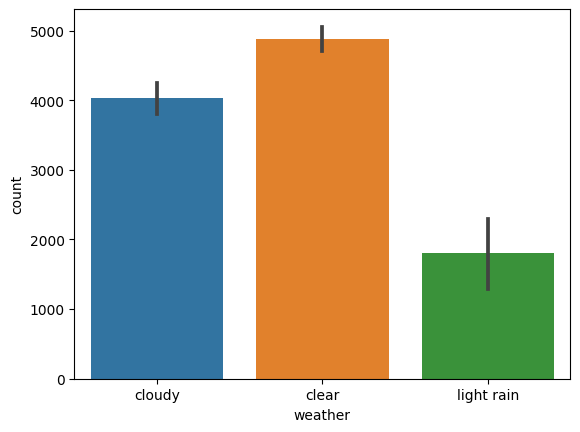

In [35]:
sns.barplot(x = 'weather',y = 'count', data = bike_rental_df, estimator = np.mean) # weather

<b> 1.3 Compare the number of registered and casual bike rentals over time by month. Create a stacked bar chart to show the contributions of each user type. </b>

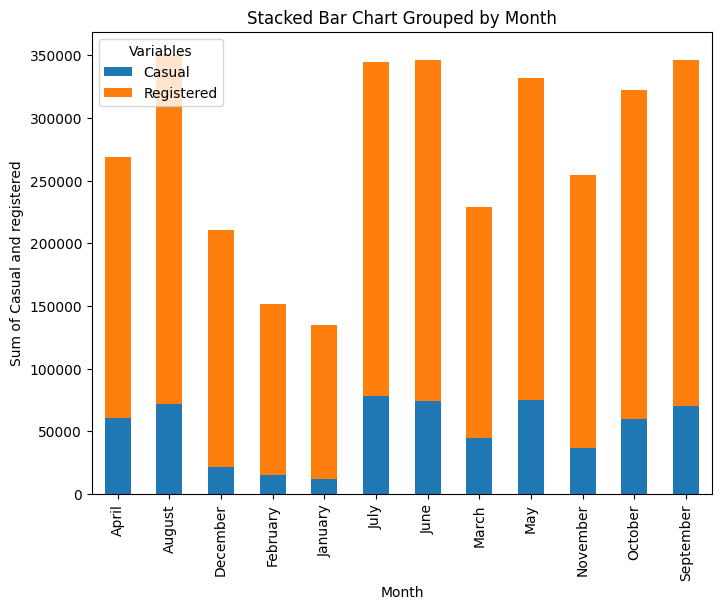

In [106]:
### Code here
df = pd.DataFrame({'Casual':list(bike_rental_df['casual']),
                   'Registered': list(bike_rental_df['registered']),
                   'month':list(bike_rental_df['month'])
})
grouped_df = df.groupby('month').sum()

ax = grouped_df.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Month')
plt.ylabel('Sum of Casual and registered')
plt.title('Stacked Bar Chart Grouped by Month')
plt.legend(title='Variables')
plt.show()

<b> 1.4 Plot relationships between the following features and the target variable count as a small multiple of scatter plots. </b>

1. temp
2. feels_temp
3. humidity
4. windspeed
<b></b>

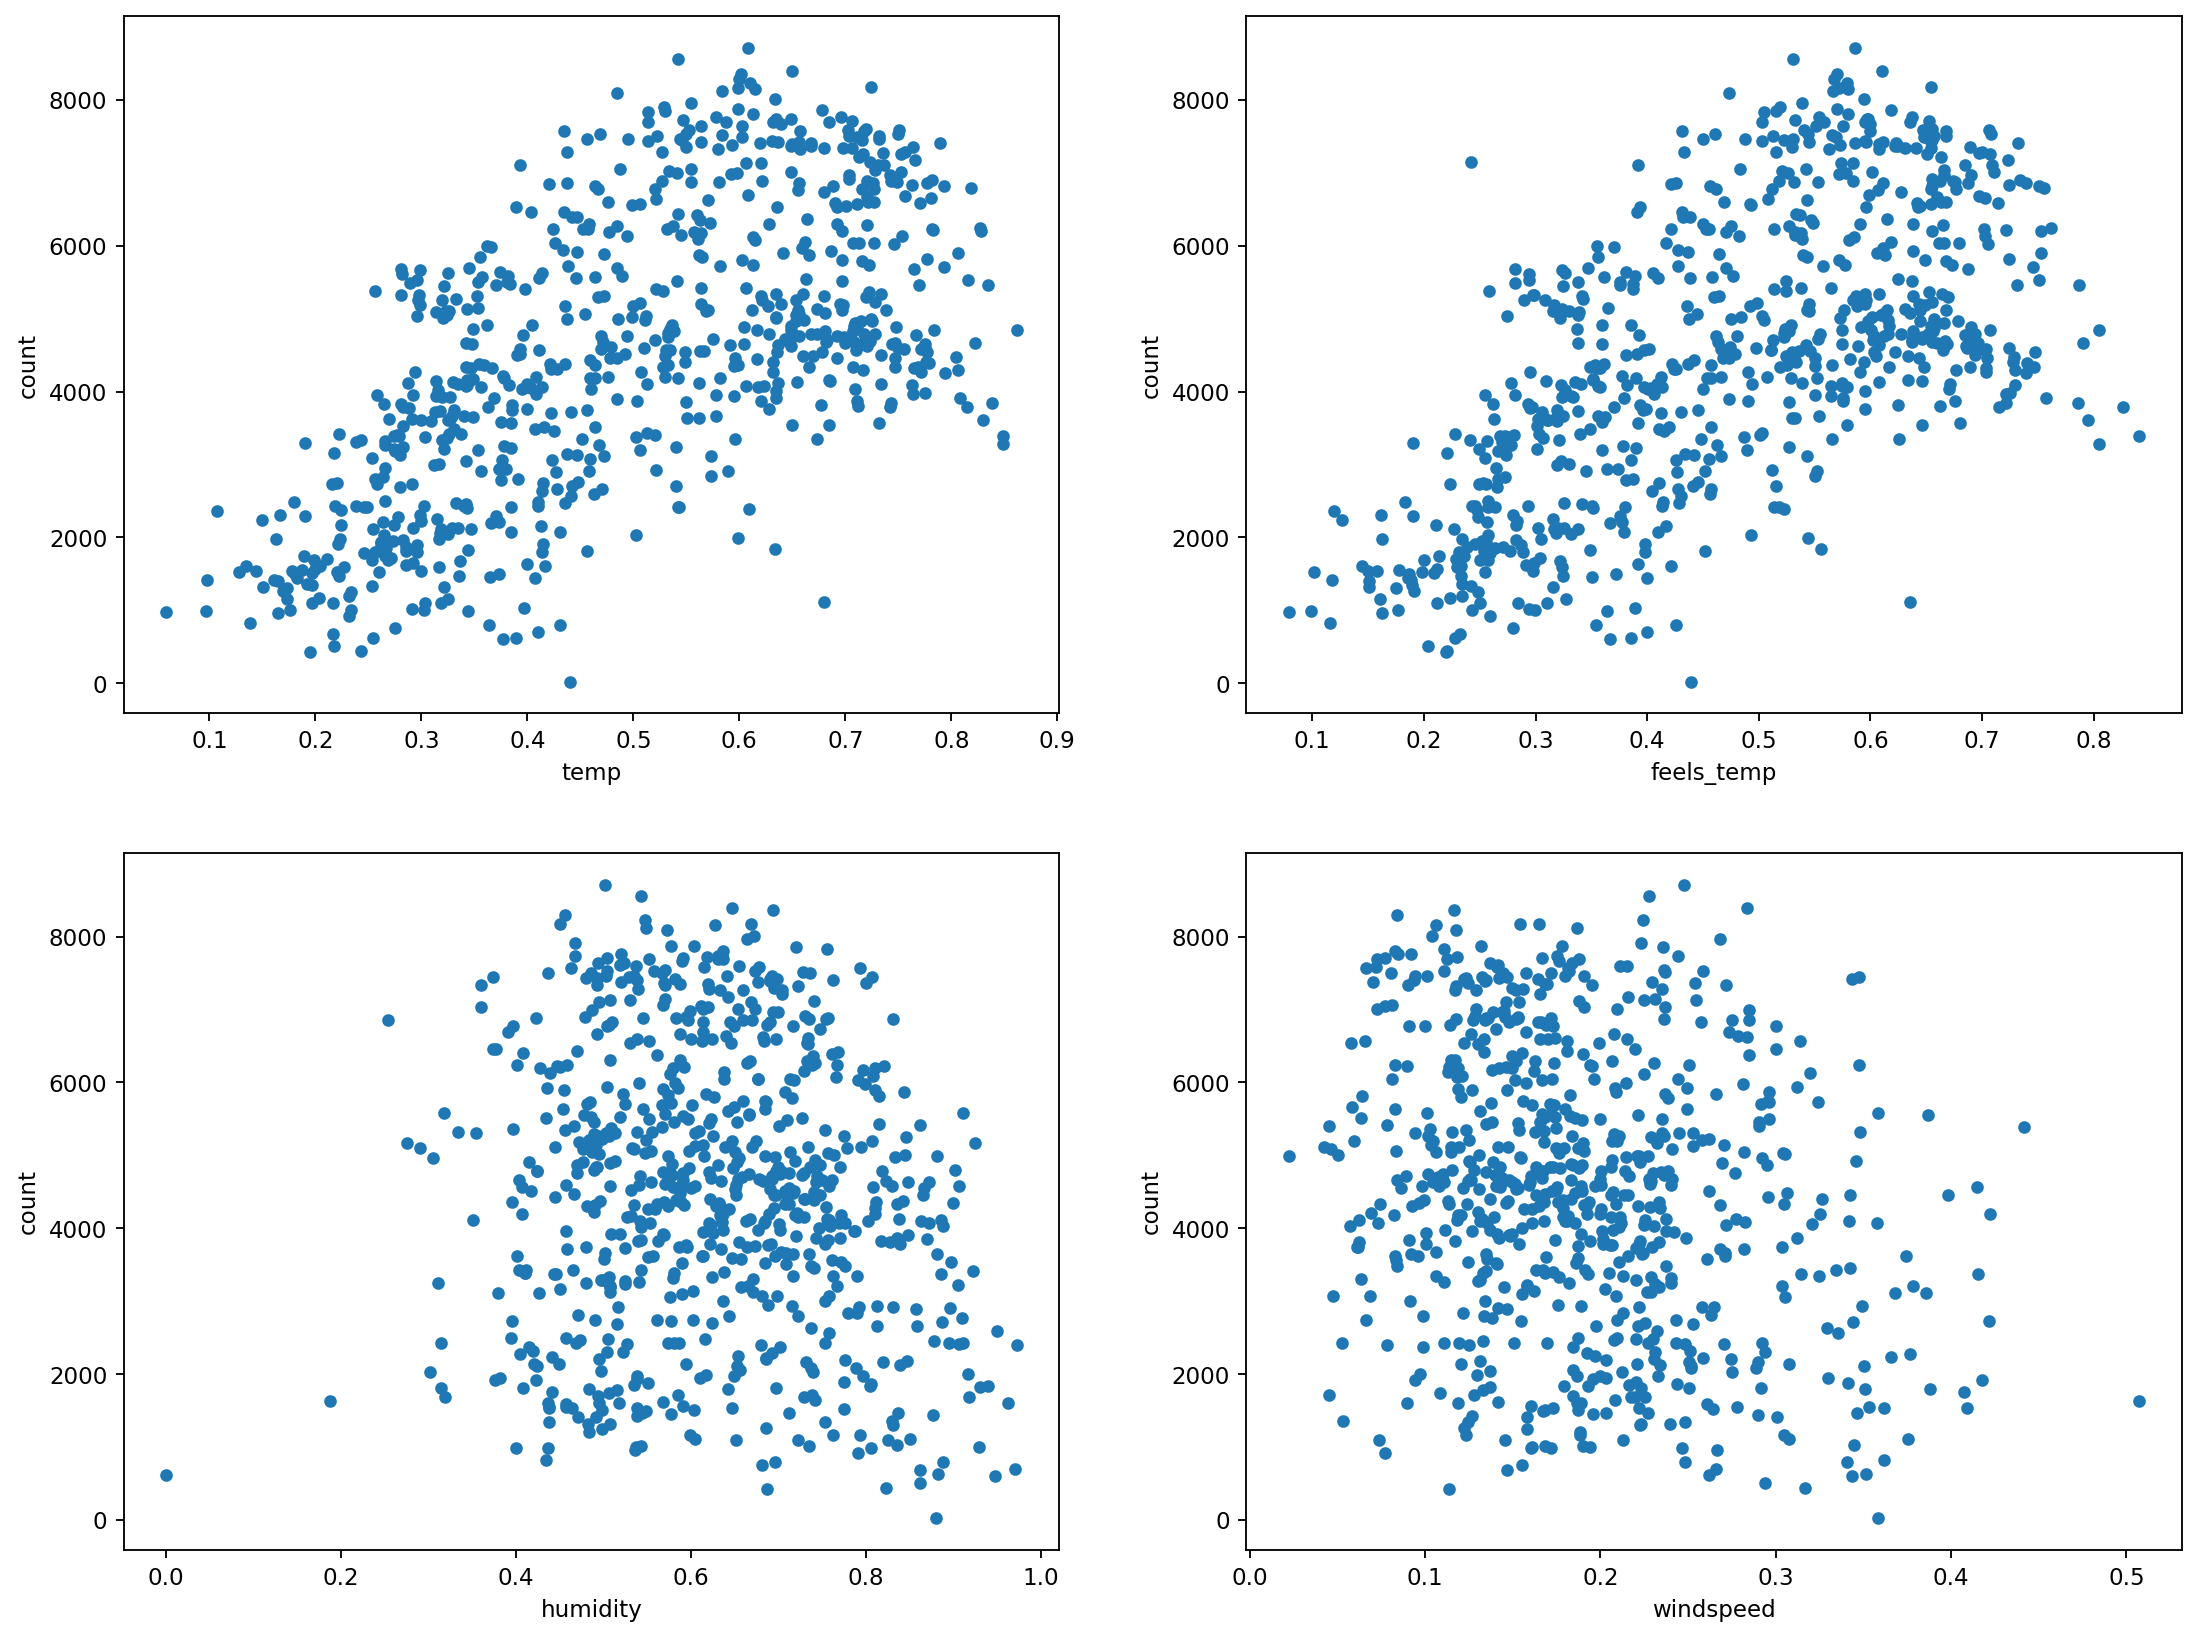

In [93]:
### Code here
fig,ax = plt.subplots(2,2,figsize=(16,12), dpi = 166)
ax = ax.ravel()
bike_rental_df.plot.scatter(x = 'temp', y = 'count', ax = ax[0]); # temp
bike_rental_df.plot.scatter(x = 'feels_temp', y = 'count',ax = ax[1]); # feels_temp
bike_rental_df.plot.scatter(x = 'humidity', y = 'count', ax = ax[2]); # humidity
bike_rental_df.plot.scatter(x = 'windspeed', y = 'count', ax = ax[3]); # windspeed

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression


The objective of this dataset is to predict the count of bike rentals based on weather and time. We will use linear regression to predict the count using weather and time. 

In [145]:
# split data into features and labels

bike_rental_X = bike_rental_df.drop(columns=['count'])
bike_rental_y = bike_rental_df['count']

**2.1.1 Plot the relationships between the label (count) and the continuous features (temp, feels_temp, humidity, windspeed, casual, registered) using a small multiple of scatter plots. Make sure to label the axes.**

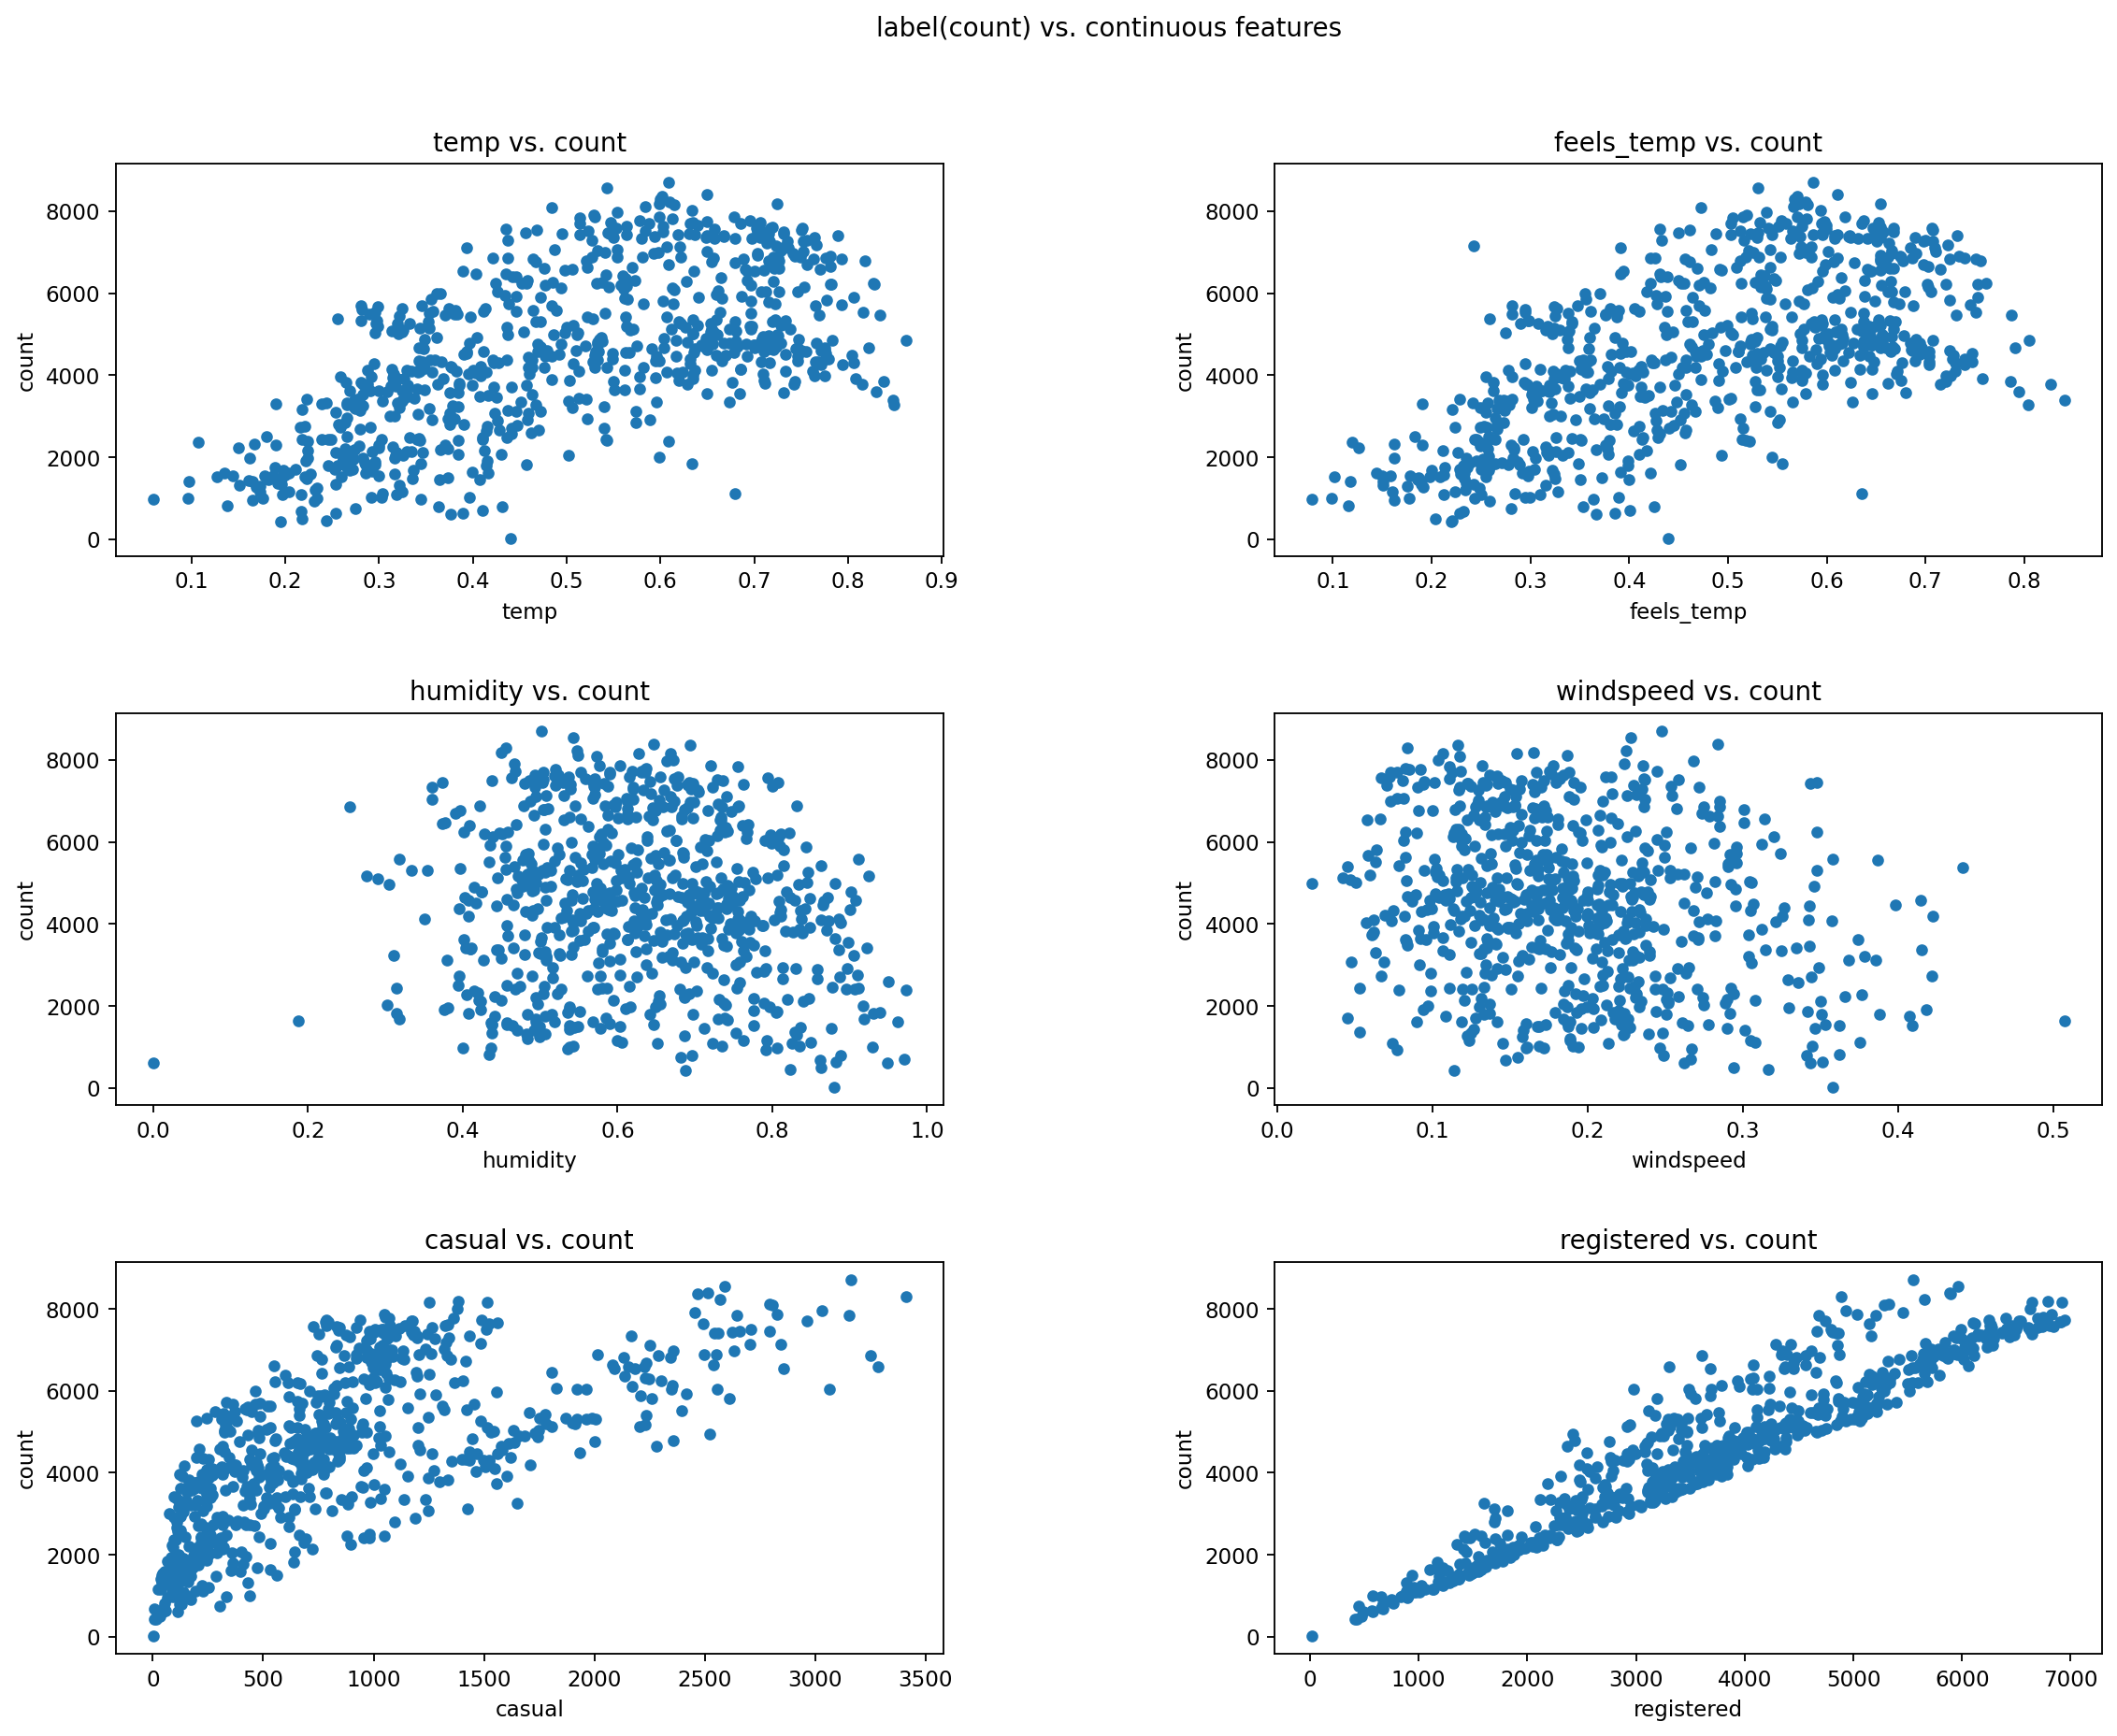

In [101]:
### Code here
fig,ax = plt.subplots(3,2,figsize=(16,12), dpi = 166)
ax = ax.ravel()
bike_rental_df.plot.scatter(x = 'temp', y = 'count', ax = ax[0]); # temp
ax[0].set_xlabel('temp');
ax[0].set_title('temp vs. count');

bike_rental_df.plot.scatter(x = 'feels_temp', y = 'count',ax = ax[1]); # feels_temp
ax[1].set_xlabel('feels_temp');
ax[1].set_title('feels_temp vs. count');

bike_rental_df.plot.scatter(x = 'humidity', y = 'count', ax = ax[2]); # humidity
ax[2].set_xlabel('humidity');
ax[2].set_title('humidity vs. count');

bike_rental_df.plot.scatter(x = 'windspeed', y = 'count', ax = ax[3]); # windspeed
ax[3].set_xlabel('windspeed');
ax[3].set_title('windspeed vs. count');

bike_rental_df.plot.scatter(x = 'casual', y = 'count', ax = ax[4]); # casual
ax[4].set_xlabel('casual');
ax[4].set_title('casual vs. count');

bike_rental_df.plot.scatter(x = 'registered', y = 'count', ax = ax[5]); # registered
ax[5].set_xlabel('registered');
ax[5].set_title('registered vs. count');

fig.suptitle('label(count) vs. continuous features');
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

**2.1.2 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

### Comment here
For humidity and windspeed, I don't think linear regression will be a good model, because we cannot observe obvious linear relationship. And for the other four variables, linear regression may be a fit. 

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


**2.1.3 Encode the categorical variables of the Bike Rental dataset.**

In [123]:
### Code here

cate_features = ['month', 
                 'season',
                  'holiday',
                   'weekday',
                    'working_day',
                     'weather' ,
                     ]

#
#preprocess = make_column_transformer((StandardScaler(), num_featureOneHotEncoder(handle_unknow = 'ignore')

In [146]:
### Code here
# I use ordinal encoding
bike_rental_encod = bike_rental_X
bike_rental_encod['month'] = bike_rental_df.month.astype("category").cat.codes
bike_rental_encod['season'] = bike_rental_df.season.astype("category").cat.codes
bike_rental_encod['holiday'] = bike_rental_df.holiday.astype("category").cat.codes
bike_rental_encod['weekday'] = bike_rental_df.weekday.astype("category").cat.codes
bike_rental_encod['working_day'] = bike_rental_df.working_day.astype("category").cat.codes
bike_rental_encod['weather'] = bike_rental_df.weather.astype("category").cat.codes
bike_rental_encod.head()

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered
0,4,3,0,2,0,1,0.344167,0.363625,0.805833,0.160446,331,654
1,4,3,0,3,0,1,0.363478,0.353739,0.696087,0.248539,131,670
2,4,3,0,1,1,0,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,3,0,5,1,0,0.200000,0.212122,0.590435,0.160296,108,1454
4,4,3,0,6,1,0,0.226957,0.229270,0.436957,0.186900,82,1518


**2.1.4 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

In [147]:
### Code here

corr = bike_rental_encod.corr()
filtered_corr = corr[corr >= 0.9]
print(filtered_corr)

# we choose to delete "feels_temp" in this pair

bike_rental_encod = bike_rental_encod.drop("feels_temp", axis = 1)

             month  season  holiday  weekday  working_day  weather      temp  \
month          1.0     NaN      NaN      NaN          NaN      NaN       NaN   
season         NaN     1.0      NaN      NaN          NaN      NaN       NaN   
holiday        NaN     NaN      1.0      NaN          NaN      NaN       NaN   
weekday        NaN     NaN      NaN      1.0          NaN      NaN       NaN   
working_day    NaN     NaN      NaN      NaN          1.0      NaN       NaN   
weather        NaN     NaN      NaN      NaN          NaN      1.0       NaN   
temp           NaN     NaN      NaN      NaN          NaN      NaN  1.000000   
feels_temp     NaN     NaN      NaN      NaN          NaN      NaN  0.991702   
humidity       NaN     NaN      NaN      NaN          NaN      NaN       NaN   
windspeed      NaN     NaN      NaN      NaN          NaN      NaN       NaN   
casual         NaN     NaN      NaN      NaN          NaN      NaN       NaN   
registered     NaN     NaN      NaN     

### Comment here
So from this matrix, we can see "temp" vs. "feels_temp" is over 0.9. It's necessary to drop it because we need to prevent the collinearty problem in following regression.

In [148]:
bike_rental_encod.head()

,month,season,holiday,weekday,working_day,weather,temp,humidity,windspeed,casual,registered
0,4,3,0,2,0,1,0.344167,0.805833,0.160446,331,654
1,4,3,0,3,0,1,0.363478,0.696087,0.248539,131,670
2,4,3,0,1,1,0,0.196364,0.437273,0.248309,120,1229
3,4,3,0,5,1,0,0.200000,0.590435,0.160296,108,1454
4,4,3,0,6,1,0,0.226957,0.436957,0.186900,82,1518


**2.1.5 Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [153]:
### Code here
bike_rental_X_dev, bike_rental_X_test, bike_rental_y_dev, bike_rental_y_test  = train_test_split(bike_rental_encod, bike_rental_y, test_size = 0.2, random_state = 42)
bike_rental_X_train, bike_rental_X_val, bike_rental_y_train, bike_rental_y_val = train_test_split(bike_rental_X_dev, bike_rental_y_dev, test_size = 0.25, random_state = 84)

**2.1.6 Standardize the columns in the feature matrices.**

In [154]:
### Code here
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
bike_rental_X_test = ss.fit_transform(bike_rental_X_test)
bike_rental_X_train = ss.fit_transform(bike_rental_X_train)
bike_rental_X_val = ss.fit_transform(bike_rental_X_val)

In [157]:
#Adding a column of ones to the feature matrices for the bias term.

bike_rental_X_train = np.hstack([np.ones((bike_rental_X_train.shape[0], 1)), bike_rental_X_train])
bike_rental_X_val = np.hstack([np.ones((bike_rental_X_val.shape[0], 1)), bike_rental_X_val])
bike_rental_X_test = np.hstack([np.ones((bike_rental_X_test.shape[0], 1)), bike_rental_X_test])


At the end of this pre-processing, you should have the following vectors and matrices: 
- Bike Rental Prediction dataset: bike_rental_X_train, bike_rental_X_val, bike_rental_X_test, bike_rental_y_train, bike_rental_y_val, bike_rental_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.7 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [158]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        n_features = X.shape[1]
        identity_matrix = np.identity(n_features)
        self.coefficients = np.linalg.solve(
            X.T @ X + self.alpha * identity_matrix,
            X.T @ y
        )

        return None
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred = X @ self.coefficients

        return y_pred


### Train, Evaluate, and Interpret LR Model

**2.1.8 Train a linear regression model ($\alpha = 0$) on the bike rental training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [159]:
def get_report(y_pred, y_test):
    """
    function to Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.
    
    Returns a dataframe with 6 rows.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual':actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [161]:
### Code here
model_lin = LinearRegression()
model_lin.train(bike_rental_X_train, bike_rental_y_train)

y_pred = model_lin.predict(bike_rental_X_test)

print(get_report(y_pred, bike_rental_y_test))

           Prediction  Actual
Position                     
1         6643.865785    6606
2         1822.654677    1550
3         3942.719132    3747
145       3132.865459    2792
146       5333.165564    5180
147       4184.781576    3958


In [163]:
def r_squared(y_true, y_pred):
    # Total sum of squares (TSS)
    tss = np.sum((y_true - np.mean(y_true))**2)
    # Residual sum of squares (RSS)
    rss = np.sum((y_true - y_pred)**2)
    # R-squared
    r2 = 1 - (rss / tss)
    return r2

#train group
y_pred = model_lin.predict(bike_rental_X_train)
r2_score_train = r_squared(bike_rental_y_train, y_pred)
print(f"train group R2: {r2_score_train}")

# val group
y_pred = model_lin.predict(bike_rental_X_val)
r2_score_val = r_squared(bike_rental_y_val, y_pred)
print(f"val group R2: {r2_score_val}")

# test group
y_pred = model_lin.predict(bike_rental_X_test)
r2_score_test = r_squared(bike_rental_y_test, y_pred)
print(f"test group R2: {r2_score_test}")

train group R2: 1.0
val group R2: 0.9711558519790393
test group R2: 0.9872897850690731


**2.1.9 As a baseline model, use the mean of the training labels (bike_rental_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.** 

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [187]:
### Code here
train_mean = np.mean(bike_rental_y_train)


#train group
shape = (len(bike_rental_X_train), )
y_pred = np.full(shape, train_mean)
r2_score_train = r_squared(bike_rental_y_train, y_pred)
print(f"train group R2: {r2_score_train}")

# #val group
shape = (len(bike_rental_X_val), )
y_pred = np.full(shape, train_mean)
r2_score_train = r_squared(bike_rental_y_val, y_pred)
print(f"val group R2: {r2_score_train}")

# test group
shape = (len(bike_rental_X_test), )
y_pred = np.full(shape, train_mean)
r2_score_train = r_squared(bike_rental_y_test, y_pred)
print(f"test group R2: {r2_score_train}")


train group R2: 0.0
val group R2: -0.025597785453693733
test group R2: -0.01069766791680582


**2.1.10 Interpret your model trained on the bike rental dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

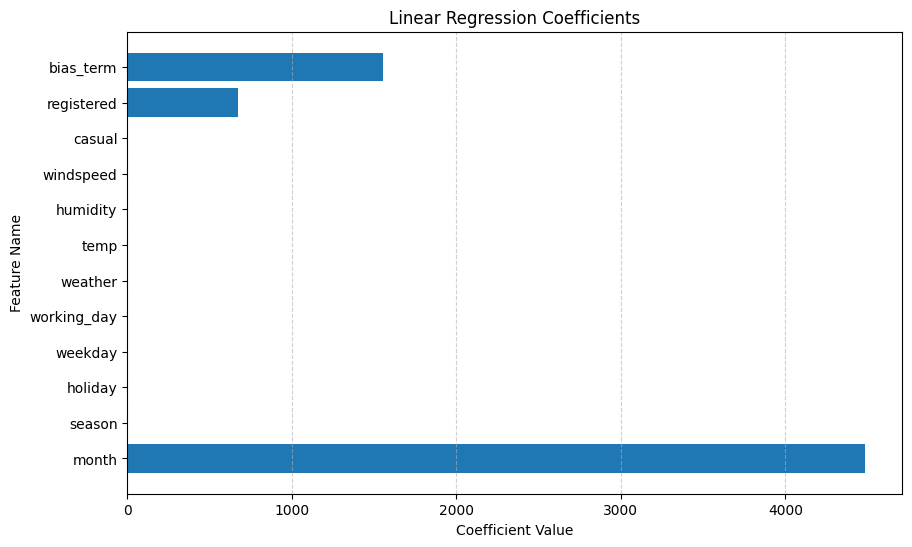

In [207]:
### Code here
feature_names = bike_rental_encod.columns.tolist()
feature_names.append('bias_term')
coefficients = model_lin.coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Linear Regression Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

**2.1.11 According to your model, which features are the greatest contributors to the car price?**

### Comment here
In this way, we can see that the greatest contributors will be month

### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the bike rental dataset.

**2.1.12 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

In [226]:
### Code here
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

alpha_range = np.logspace(-5, 1, 20)
r2_train = []
r2_val = []
for alpha in alpha_range:
    model = LinearRegression(alpha)

    model.train(bike_rental_X_train, bike_rental_y_train)
    y_pred_train = model.predict(bike_rental_X_train)
    r2_train.append(r_squared(bike_rental_y_train, y_pred_train))

    y_pred_val = model.predict(bike_rental_X_val)
    r2_val.append(r_squared(bike_rental_y_val, y_pred_val))

print(r2_train)
print(r2_val)


[0.9999999999999964, 0.9999999999999846, 0.9999999999999339, 0.9999999999997172, 0.9999999999987895, 0.9999999999948176, 0.9999999999778123, 0.9999999999050075, 0.9999999995933104, 0.9999999982588682, 0.9999999925460018, 0.9999999680901975, 0.9999998634122328, 0.9999994154764658, 0.9999974997081074, 0.9999893152698452, 0.999954429865814, 0.9998064273081271, 0.9991844388724955, 0.9966191931648445]
[0.9711558360429484, 0.9711558190050585, 0.971155783751284, 0.9711557108062385, 0.9711555598723611, 0.9711552475671602, 0.9711546013552976, 0.9711532642140036, 0.9711504973139737, 0.9711447714877165, 0.97113292084589, 0.9711083868908117, 0.9710575656577916, 0.9709521652911329, 0.9707330336826986, 0.9702751683257514, 0.9693088678872702, 0.9672297516805024, 0.9625973599458157, 0.951686970290855]


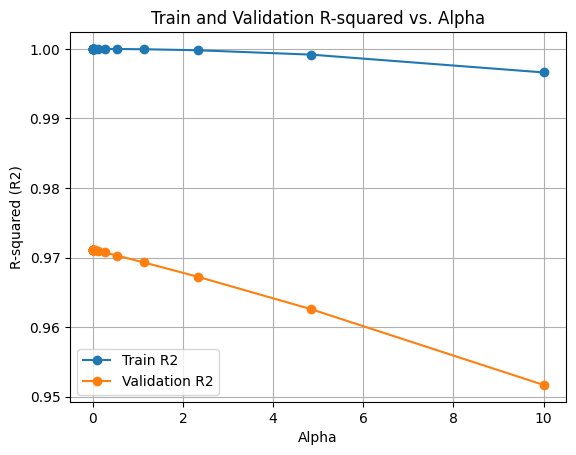

In [230]:
data = {'alpha': alpha_range.tolist(),
        'train_r2': r2_train,
        'val_r2': r2_val}
df = pd.DataFrame(data)
plt.plot(df['alpha'], df['train_r2'], label='Train R2', marker='o')
plt.plot(df['alpha'], df['val_r2'], label='Validation R2', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R-squared (R2)')
plt.title('Train and Validation R-squared vs. Alpha')
plt.legend()
plt.grid(True)
plt.show()

**2.1.13 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

 ### Comment here
In this way, we can see that the best performance exists when alpha is small both in train and validation. In this way, increasing alpha decrease the R2 score in bothh train and validation group.

### 2.2 Logistic Regression

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [237]:
### Code here
loan_data_df = pd.read_csv("loan_data.csv")

In [238]:
loan_data_df = loan_data_df.drop(columns=['Loan_ID'])
loan_data_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**2.2.2 Are there any missing values in the dataset? If so, what is the best way to deal with it and why?**

In [241]:
### Code here
loan_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [249]:
### Code here
loan_data_df_clean = loan_data_df.dropna()
loan_data_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


### Comment here
We can see that except the ApplicantIncome, Education, CoapplicantIncome, Loan_Status, Property_Area, other six columns are all with some missing values.

For our dataset, I will suggest we can ignore the missing value because our dataset is large enough to ignore it. 

**2.2.3 Encode the categorical variables.**

In [260]:
### Code here
df_encod = loan_data_df_clean
df_encod['Gender'] = loan_data_df_clean.Gender.astype("category").cat.codes
df_encod['Married'] = loan_data_df_clean.Married.astype("category").cat.codes
df_encod['Education'] = loan_data_df_clean.Education.astype("category").cat.codes
df_encod['Self_Employed'] = loan_data_df_clean.Self_Employed.astype("category").cat.codes
df_encod['Property_Area'] = loan_data_df_clean.Property_Area.astype("category").cat.codes
df_encod['Loan_Status'] = loan_data_df_clean.Loan_Status.astype("category").cat.codes
df_encod['Dependents'] = loan_data_df_clean.Dependents.astype("category").cat.codes

/var/folders/_7/4x3wd1kx5rjbm3xrvk8s_tkm0000gn/T/ipykernel_66895/3697606888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encod['Gender'] = loan_data_df_clean.Gender.astype("category").cat.codes
/var/folders/_7/4x3wd1kx5rjbm3xrvk8s_tkm0000gn/T/ipykernel_66895/3697606888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encod['Married'] = loan_data_df_clean.Married.astype("category").cat.codes
/var/folders/_7/4x3wd1kx5rjbm3xrvk8s_tkm0000gn/T/ipykernel_66895/3697606888.py:5: SettingWithCopyWarni

In [261]:
df_encod.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

In [262]:
### Code here
summary_stats = df_encod.describe()
print(summary_stats)

           Gender     Married  Dependents   Education  Self_Employed  \
count  480.000000  480.000000  480.000000  480.000000     480.000000   
mean     0.820833    0.647917    0.777083    0.202083       0.137500   
std      0.383892    0.478118    1.020815    0.401973       0.344734   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    2.000000    0.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       480.000000         480.000000  480.000000        480.000000   
mean       5364.231250        1581.093583  144.735417        342.050000   
std        5668.251251        2617.692267   80.508164         65.212401   
min         150.000000           0.000000    9.0000

### Comment here
Because in this dataset, they are all "Yes/No" category, so if it's balanced, the mean should be 0.5. But we can see that most of them are not balanced. 

**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

In [263]:
### Code here

corr = df_encod.corr()
filtered_corr = corr[corr >= 0.9]
print(filtered_corr)

                   Gender  Married  Dependents  Education  Self_Employed  \
Gender                1.0      NaN         NaN        NaN            NaN   
Married               NaN      1.0         NaN        NaN            NaN   
Dependents            NaN      NaN         1.0        NaN            NaN   
Education             NaN      NaN         NaN        1.0            NaN   
Self_Employed         NaN      NaN         NaN        NaN            1.0   
ApplicantIncome       NaN      NaN         NaN        NaN            NaN   
CoapplicantIncome     NaN      NaN         NaN        NaN            NaN   
LoanAmount            NaN      NaN         NaN        NaN            NaN   
Loan_Amount_Term      NaN      NaN         NaN        NaN            NaN   
Credit_History        NaN      NaN         NaN        NaN            NaN   
Property_Area         NaN      NaN         NaN        NaN            NaN   
Loan_Status           NaN      NaN         NaN        NaN            NaN   

           

In [38]:
### Code here


In [39]:
### Code here


**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [264]:
### Code here
numpy_vectors = {}
for column in df_encod.columns:
    numpy_vectors[column] = df_encod[column].values.reshape(-1, 1)

In [272]:
target = pd.Series(df_encod.Loan_Status)
feature = df_encod.drop(df_encod['Loan_Status'])

KeyError: '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] not found in axis'

### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [41]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

In [42]:
### Code here


In [43]:
### Code here 


In [44]:
### Code here


In [45]:
### Code here


### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

In [46]:
### Code here


In [47]:
### Comment here


### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [48]:
### Code here


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [49]:
### Code here
